# 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

# 데이터 생성하기

In [5]:
df = pd.DataFrame(columns = ['x', 'y']) # 표본 집합 행렬 생성
dc = pd.DataFrame(columns = ['x', 'y']) # 중심 집합 행렬 생성

In [6]:
# 표본 집합 좌표 입력
df.loc[0] = [1,2]
df.loc[1] = [2,3]
df.loc[2] = [4,2]
df.loc[3] = [7,10]
df.loc[4] = [5,7]
df.loc[5] = [9,7]

df.head(6)

,x,y
0,1,2
1,2,3
2,4,2
3,7,10
4,5,7
5,9,7


In [7]:
# 중심 집합 좌표 입력
dc.loc[0] = [2,8]
dc.loc[1] = [8,1]

dc.head(2)

,x,y
0,2,8
1,8,1


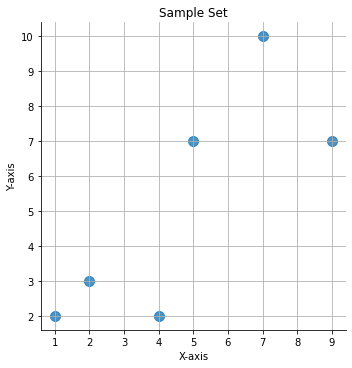

In [12]:
# 입력한 좌표 시각화
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={'s':100})
plt.grid(True)
plt.title('Sample Set')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

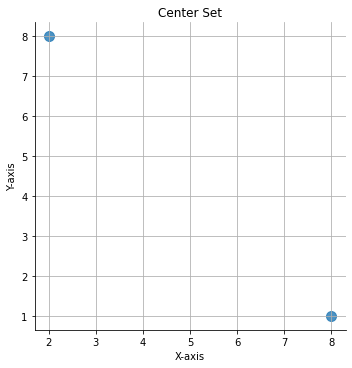

In [13]:
sns.lmplot('x', 'y', data=dc, fit_reg=False, scatter_kws={'s':100})
plt.grid(True)
plt.title('Center Set')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# K-평균 군집화

In [14]:
data_points = df.values # 데이터 행렬화
data_center = dc.values

In [16]:
kmeans = KMeans(n_clusters=2, init = data_center).fit(data_points) # K-Means 평균 계산
kmeans.labels_

<ipython-input-16-6c75ba0660e7>:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  kmeans = KMeans(n_clusters=2, init = data_center).fit(data_points) # K-Mean 평균 계산


array([0, 0, 0, 1, 1, 1])

In [17]:
kmeans.cluster_centers_ # 각 클러스트의 중심 출력

array([[2.33333333, 2.33333333],
       [7.        , 8.        ]])

In [18]:
df['cluster_id'] = kmeans.labels_ # 각 클러스트를 라벨링하기
df

,x,y,cluster_id
0,1,2,0
1,2,3,0
2,4,2,0
3,7,10,1
4,5,7,1
5,9,7,1


Text(27.77640625, 0.5, 'Y-axis')

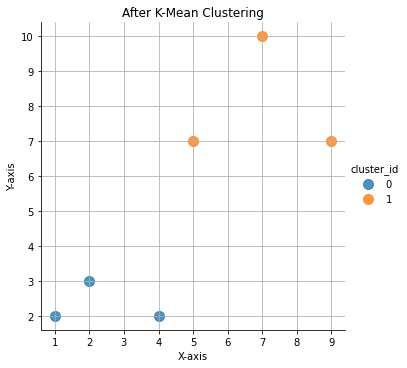

In [19]:
# 계산한 좌표 시각화
sns.lmplot('x', 'y', data=df, fit_reg=False, 
           scatter_kws={'s':100}, hue = 'cluster_id')
plt.grid(True)
plt.title('After K-Mean Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')